<h1 align="center">Tarea 2 Especializacion en estadistica aplicada</h1>


- Nombre: Mateo Orozco Baldovino
- Especialidad en Estadistica Aplicada UTB

### Caracteristicas del entorno de desarrollo:
- Para el presente trabajo yo agarre el dataset desde este link (https://archive.ics.uci.edu/dataset/320/student+performance).
- Estoy realizando el analisis de este dataset usando python en visual studio code y jupyter notebook.
- Para las librerias utilizo un entorno virtual creado con conda.

Esta tarea puede ser encontrada en este repositorio
[Github](https://github.com/TheMaorba/DataMining.git)

## Añadiendo librerías necesarias para trabajar con datos y visualización

In [1]:

import respuestas as rp
import pandas as pd
import numpy as np


## Punto 1: Descargue y cargue los datos en su notebook, usando Pandas preferiblemente. Imprima para tener una idea de los datos.

In [2]:
df0 = pd.read_csv(r"D:\Documentos\Especialidad\DataMining\Tarea2\Dataset\bank.csv", sep=";")
print(df0.head(5))


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [3]:
print(f"Se imprime las caracteristicas de las columnas para ver las variables numericas {df0.info()}")
print(len(df0))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Se imprime las caracteristicas de las columnas para ver las variables numericas None
45211


## Punto 2: Calcule la cantidad de datos faltantes y luego si no tiene cree artificialmente datos faltantes.

In [4]:
print(f"La cantidad de datos faltantes es de: {df0.isna().sum().sum()}")

La cantidad de datos faltantes es de: 0


Teniendo en cuenta que inicialmente la base de datos tomada para el ejemplo no tiene datos faltantes procedere a crear datos faltantes en dos columnas.
### Creando datos faltantes ya que actualmente no tiene y contar cuantos hay

In [5]:
from faltantes import GestorFaltantes
df_conna = GestorFaltantes.insertar_nans(df0)
print(f"La cantidad de faltantes en la columna es de: {GestorFaltantes.mostrar_nans(df_conna)}")

Dataset: 45211 filas × 17 columnas = 768587 valores totales
NaNs totales: 153714 (20.0%)

NaNs por columna:
age: 9042 NaNs (20.0%)
job: 9042 NaNs (20.0%)
marital: 9042 NaNs (20.0%)
education: 9042 NaNs (20.0%)
default: 9042 NaNs (20.0%)
balance: 9042 NaNs (20.0%)
housing: 9042 NaNs (20.0%)
loan: 9042 NaNs (20.0%)
contact: 9042 NaNs (20.0%)
day: 9042 NaNs (20.0%)
month: 9042 NaNs (20.0%)
duration: 9042 NaNs (20.0%)
campaign: 9042 NaNs (20.0%)
pdays: 9042 NaNs (20.0%)
previous: 9042 NaNs (20.0%)
poutcome: 9042 NaNs (20.0%)
y: 9042 NaNs (20.0%)
La cantidad de faltantes en la columna es de: None


### Creando dataframe para realizar el manejo de faltantes

In [6]:
df1 = df_conna.copy()
# df1 es el dataset que estoy utilizando para modificar las columnas

## Punto 3: Use las metodologías vistas en clase para rellenar, o poner, datos en los lugares de los datos faltantes.

All the techniques to handle missing values

- Mean/Median/Mode replacement
- Random Sample Imputation
- Capturing NAN values with a new feature
- End of Distribution Imputation
- Arbitrary Imputation
- Frequent Categories Imputation

### Manejar datos faltantes mediante la eliminacion

In [7]:
# df_sin_na = df_conna.dropna(axis=0)
# print(f"La cantidad de datos faltantes actual en la base de datos es de {df_sin_na.isna().sum().sum()}")

### Manejar datos faltantes imputando datos con un valor fijo o aleatorio

In [8]:
# Este codigo crea la columna age_random_fixed
GestorFaltantes.impute_nan_random(df1,"age",1)
print(df1['age'].isna().sum().sum())


9042


## Manejar datos faltantes mediante imputacion por la media o mediana

In [9]:
from faltantes import GestorFaltantes
GestorFaltantes.impute_nan_meanmedian(df1, "age", "mean")
GestorFaltantes.impute_nan_meanmedian(df1, "age", "median")
# Hasta este punto estan creadas las columnas age_random_fixed, age_mean y age_median

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_random_fixed,age_mean,age_median
0,58.0,NaN,married,NaN,NaN,NaN,yes,no,unknown,5.0,may,261.0,1.0,-1.0,NaN,unknown,NaN,58.0,58.000000,58.0
1,44.0,technician,single,NaN,NaN,29.0,NaN,no,NaN,5.0,may,151.0,1.0,-1.0,NaN,unknown,NaN,44.0,44.000000,44.0
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,NaN,may,76.0,1.0,-1.0,0.0,unknown,no,33.0,33.000000,33.0
3,NaN,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no,1.0,40.918355,39.0
4,33.0,NaN,single,unknown,no,NaN,NaN,no,unknown,5.0,may,198.0,1.0,NaN,0.0,unknown,NaN,33.0,33.000000,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17.0,nov,977.0,3.0,-1.0,NaN,unknown,yes,51.0,51.000000,51.0
45207,71.0,retired,NaN,primary,NaN,1729.0,no,no,cellular,17.0,nov,456.0,2.0,-1.0,0.0,unknown,yes,71.0,71.000000,71.0
45208,72.0,retired,married,NaN,no,5715.0,no,no,cellular,17.0,nov,1127.0,5.0,184.0,3.0,NaN,NaN,72.0,72.000000,72.0
45209,57.0,NaN,NaN,secondary,NaN,668.0,no,no,telephone,17.0,NaN,508.0,4.0,-1.0,NaN,unknown,NaN,57.0,57.000000,57.0


In [10]:
print(df1.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'age_random_fixed', 'age_mean',
       'age_median'],
      dtype='object')


Mediante KNN

In [11]:
from faltantes import GestorFaltantes
df_KNN = GestorFaltantes.knn_imputer_dataframe(df1)
print(f"La cantidad de datos faltantes en el nuevo df es de: {(df_KNN.isna().sum().sum())}")

La cantidad de datos faltantes en el nuevo df es de: 90420


## Punto 4: Haga gráficos para evaluar la calidad de este llenado y las formas de las distribuciones.
### Evaluando el manejo de faltantes mediante asignacion aleatoria

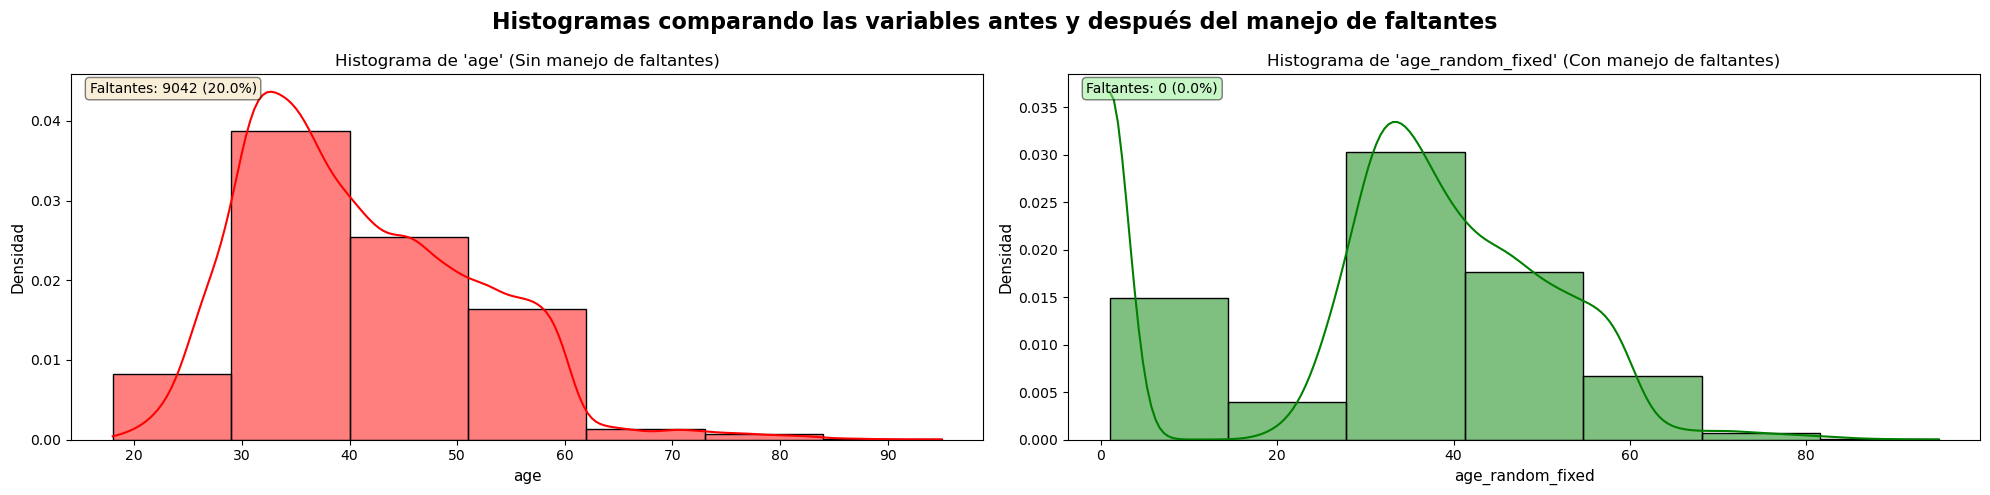

In [12]:
from graficos import Graficos
#Graficos.crear_histograma_columna(df_conna, df1, 'age')

Graficos.comparar_histogramas(
    df_original=df_conna,
    df_procesado=df1,
    columna_original='age',
    columna_procesada='age_random_fixed'
)
#Graficos.crear_histograma_columna(df_sin_na, df2, 'studytime.x')
# Hasta este punto estan creadas las columnas age_random_fixed, age_mean y age_median

### Evaluando metodo de imputacion por mediana

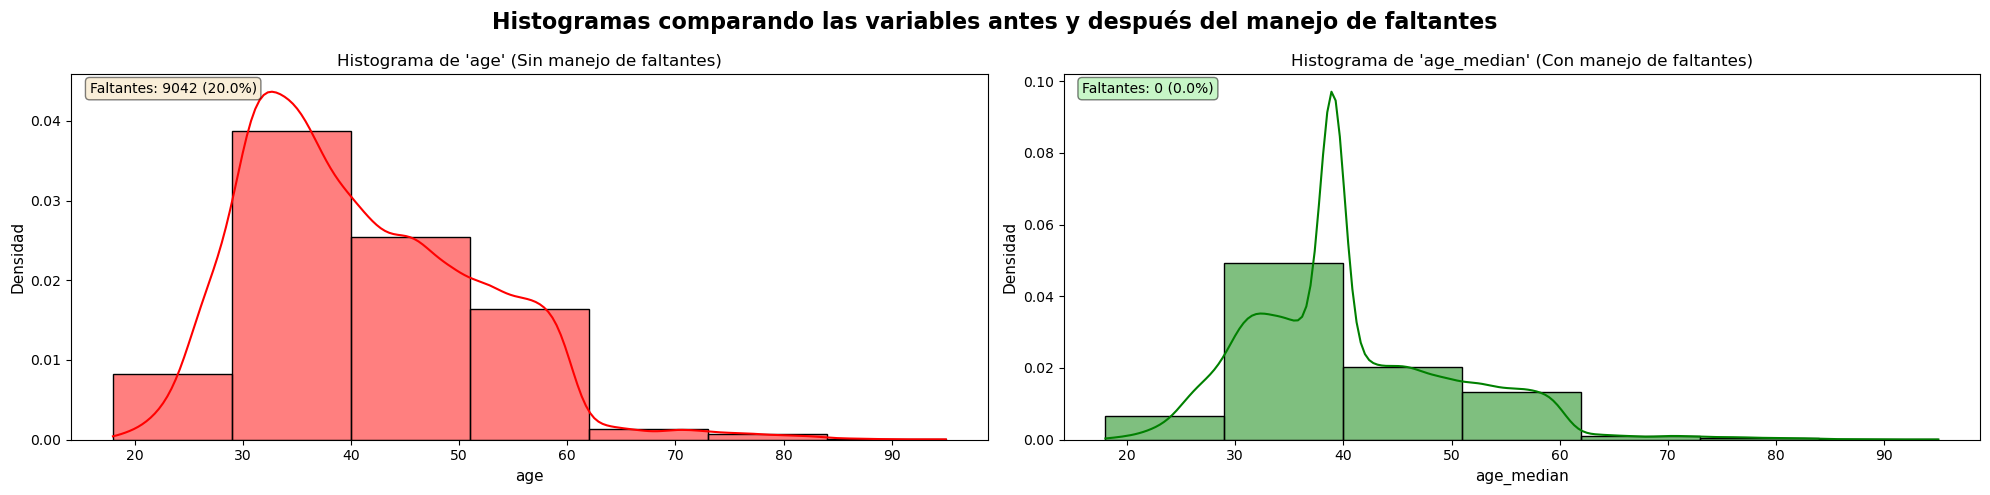

In [13]:
Graficos.comparar_histogramas(
    df_original=df_conna,
    df_procesado=df1,
    columna_original='age',
    columna_procesada='age_median'
)

### Evaluando metodo de imputacion por media

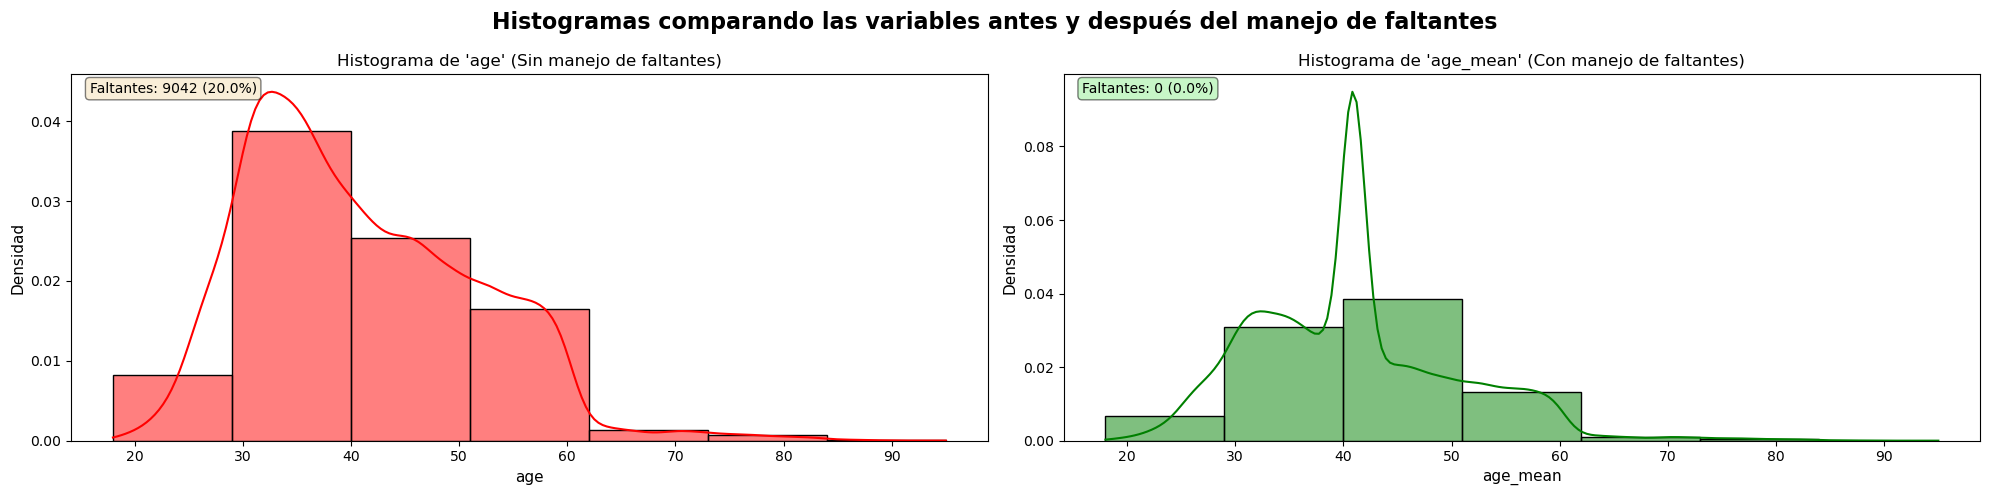

In [14]:
Graficos.comparar_histogramas(
    df_original=df_conna,
    df_procesado=df1,
    columna_original='age',
    columna_procesada='age_mean'
)

Punto 5: Escriba conclusiones acerca del proceso, ¿Qué metodología de imputación le sirvió mejor?

Punto 6: Determine si tiene datos outliers o datos extremos y diga cuales son y elimínelos. La
información para esta tarea está en el primer notebook.

d:\Documentos\Especialidad\DataMining\Tarea2\graficos.py:93: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


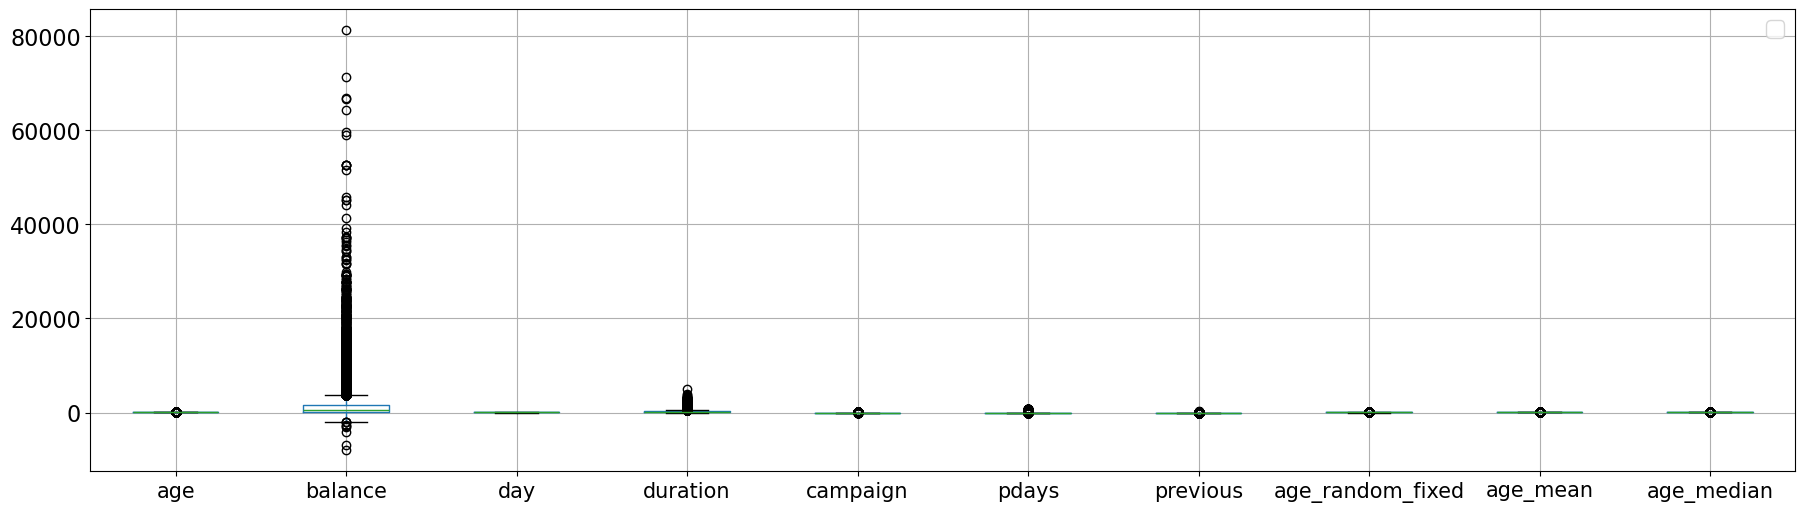

In [15]:
Graficos.ver_outliers (df_KNN)

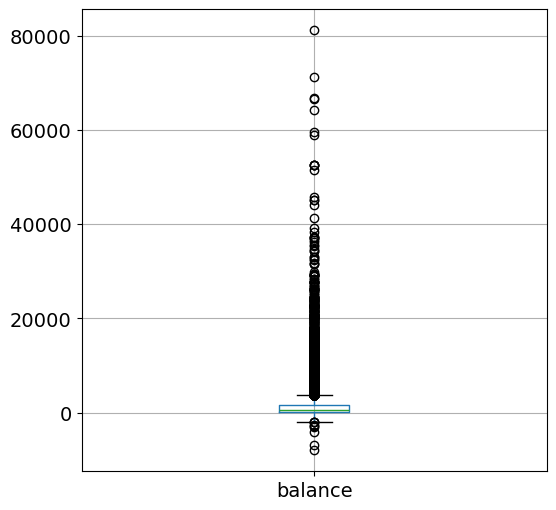

In [16]:
Graficos.ver_outliers_columna(df_KNN, "balance")

Punto 7: Adicionalmente use los algoritmos que encontrará en el segundo notebook (linear_regresion) para inferir regresiones, determine parámetros, determine el grado de regresión o coeficiente de regresión (bondad de ajuste) y escriba conclusiones.

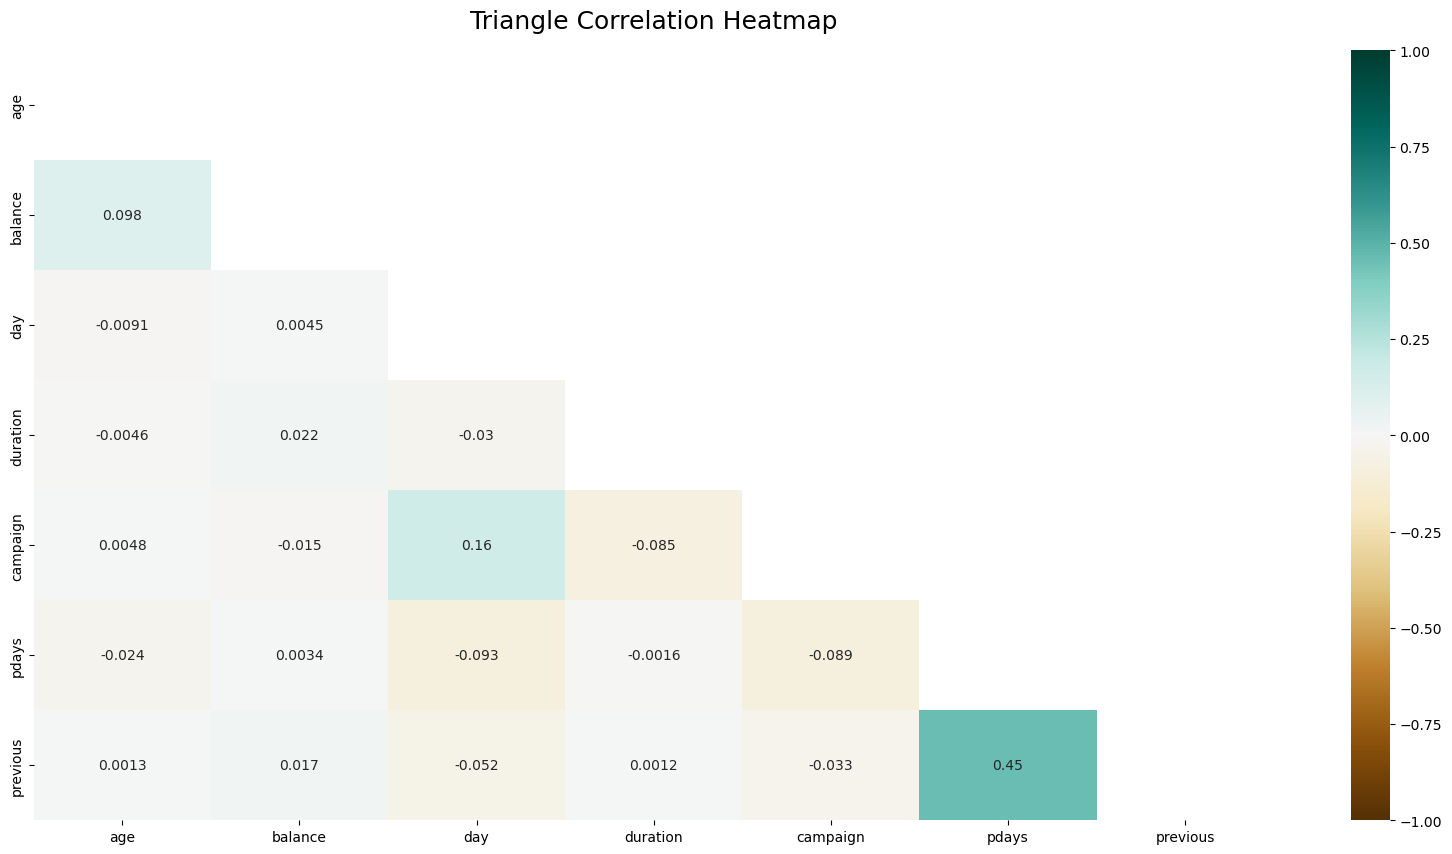

In [21]:
from regresiones import Inferencia
Inferencia.correlation_heatmap(df0)

In [20]:
print(df_KNN.dtypes)

age                 float64
job                  object
marital              object
education            object
default              object
balance             float64
housing              object
loan                 object
contact              object
day                 float64
month                object
duration            float64
campaign            float64
pdays               float64
previous            float64
poutcome             object
y                    object
age_random_fixed    float64
age_mean            float64
age_median          float64
dtype: object


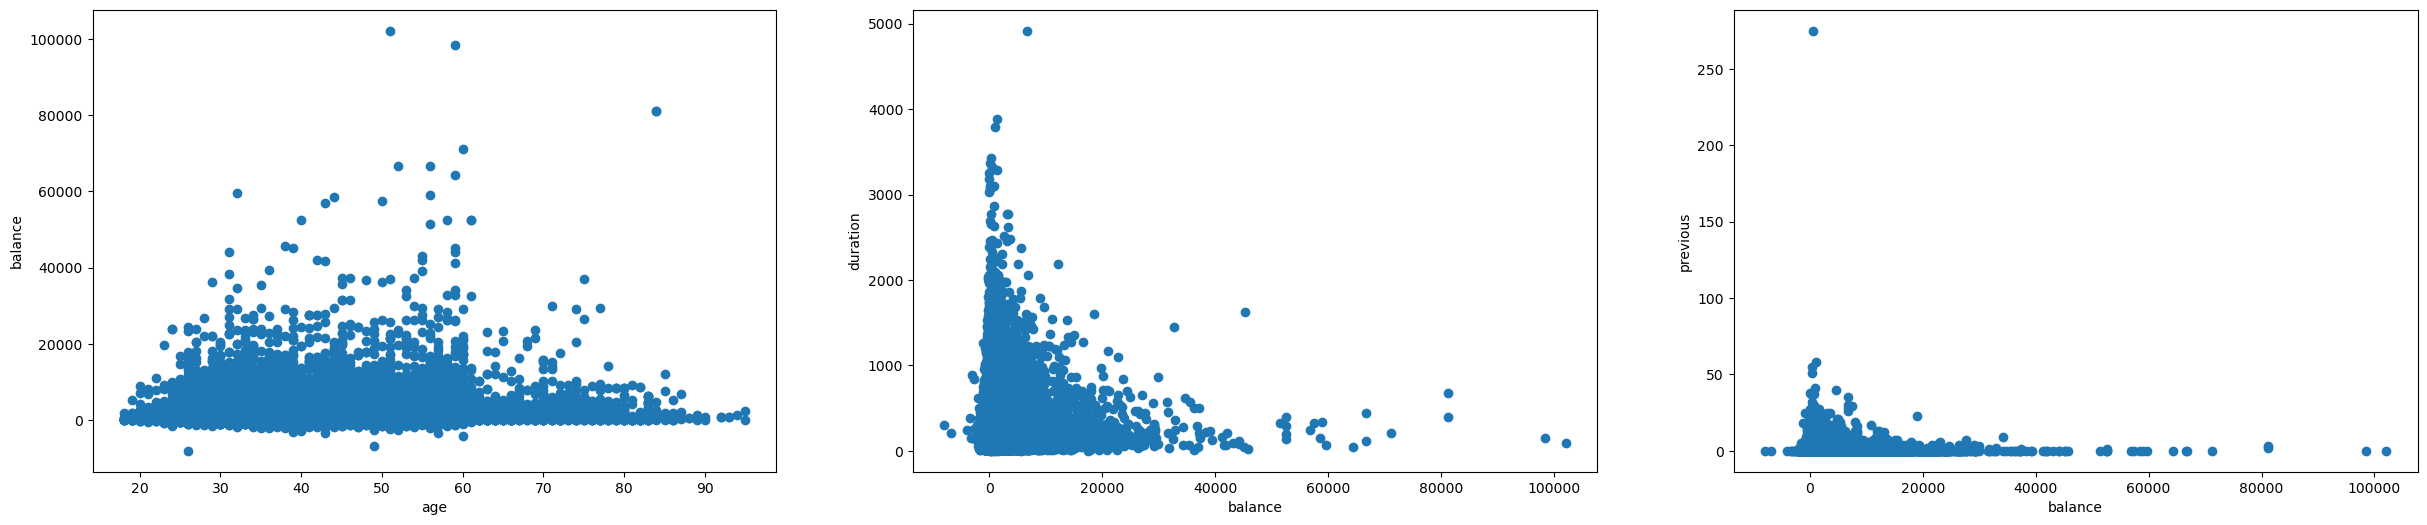

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,6))
plt.subplot(131)
plt.scatter(df0["age"],df0["balance"])
plt.xlabel("age")
plt.ylabel("balance")
plt.subplot(132)
plt.scatter(df0["balance"],df0["duration"])
plt.xlabel("balance")
plt.ylabel("duration")
plt.subplot(133)
plt.scatter(df0["balance"],df0["previous"])
plt.xlabel("balance")
plt.ylabel("previous")
plt.show()

Punto 8: Conclusiones